In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from fbprophet import Prophet
from datetime import datetime
import pandas_datareader as pdr

## prophet 모듈을 이용한 forecast예측

In [5]:
pinkwink_web = pd.read_csv('./data/PinkWink Web Traffic.csv', 
                            encoding='utf-8', thousands=',',
                            names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

hit
date            
16. 7. 1.  766.0
16. 7. 2.  377.0
16. 7. 3.  427.0
16. 7. 4.  902.0
16. 7. 5.  850.0

In [6]:
df = pd.DataFrame({'ds': pinkwink_web.index, 'y':pinkwink_web['hit']}) # pinkwink_web변수에서 날짜(index)와 방문수(hit)만 따로 저장
df.reset_index(inplace=True)
df['ds']= pd.to_datetime(df['ds'], format='%y. %m. %d.') #pandas에서 지원하는 to_datetime 함수를 사용하여 날짜라고 선언
del df['date']

m = Prophet(yearly_seasonality=True) # prophet 함수를 사용할때 주기성이 연단위(yearly_seasonality)로 있다고 알려줌
m.fit(df);

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
# 60일간의 데이터를 예측시 make_future_dataframe
future = m.make_future_dataframe(periods=60)
future.tail()

ds
420 2017-08-25
421 2017-08-26
422 2017-08-27
423 2017-08-28
424 2017-08-29

In [8]:
forecast = m.predict(future) # forecast 변수에 예측한 데이터 저장
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat  yhat_lower   yhat_upper
420 2017-08-25   908.312485  671.087080  1102.103389
421 2017-08-26   493.269868  281.884146   696.017592
422 2017-08-27   625.855539  411.584737   822.134047
423 2017-08-28  1178.497203  963.742402  1389.541376
424 2017-08-29  1214.444999  992.533705  1417.834497

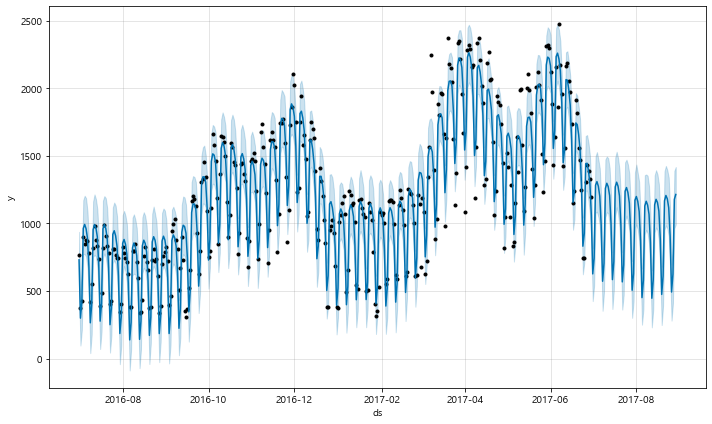

In [9]:
# 2017/06 말까지 데이터 이후 약 2개월(60일)의 예측결과
m.plot(forecast);

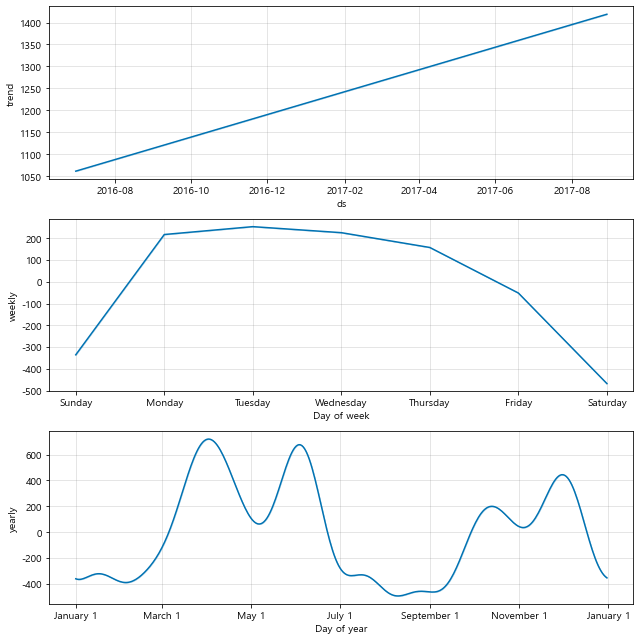

In [10]:
m.plot_components(forecast);

### seasonal 시계열 분석으로 주식데이터 분석

## 기아자동차 주식

In [4]:
# 기아자동차(000270)의 2013/1/1일부터 2020/12/04일까지 주가정보를 받음
start = datetime(2013, 1, 1)
end = datetime(2020, 12, 4)
kia = pdr.DataReader('000270.KS', data_source='yahoo', start=start, end=end) 
# data_source : 주가 정보를 받을 사이트* google가 안되서 yahoo사이트로 받음
kia.head()

High      Low     Open    Close     Volume  Adj Close
Date                                                                
2013-01-02  57400.0  56000.0  57000.0  56300.0  2145047.0    56300.0
2013-01-03  56700.0  54100.0  56300.0  54600.0  4392999.0    54600.0
2013-01-04  54600.0  52700.0  54300.0  53600.0  3916692.0    53600.0
2013-01-07  54500.0  53600.0  53800.0  54000.0  2061988.0    54000.0
2013-01-08  54800.0  53700.0  53700.0  54500.0  1899832.0    54500.0

In [14]:
kia.tail()

High      Low     Open    Close     Volume  Adj Close
Date                                                                
2020-11-30  60400.0  57800.0  58700.0  57800.0  3810442.0    57800.0
2020-12-01  60000.0  58100.0  58700.0  59800.0  1822248.0    59800.0
2020-12-02  61000.0  59400.0  60000.0  60800.0  2964672.0    60800.0
2020-12-03  64800.0  60000.0  60800.0  64700.0  4152306.0    64700.0
2020-12-04  66600.0  64300.0  65000.0  65400.0  3866516.0    65400.0

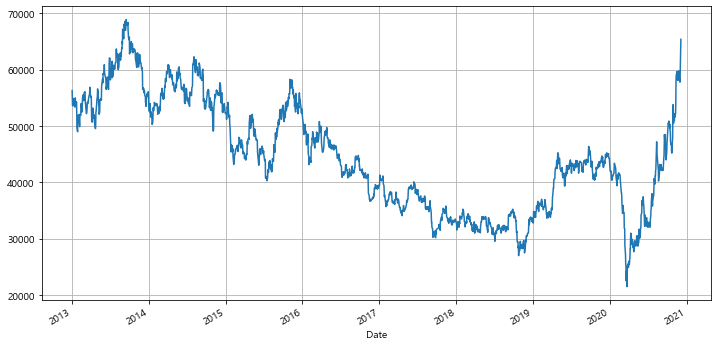

In [12]:
kia.Close.plot(figsize=(12, 6), grid=True); # 종가(Close) 기준으로 그래프를 그림
plt.show()

In [13]:
kia_trunc = kia[:'2020-06-30'] # 2020/6/30일까지 자름
kia_trunc.tail()

High      Low     Open    Close     Volume  Adj Close
Date                                                                
2020-06-24  34450.0  32550.0  32700.0  33750.0  2345625.0    33750.0
2020-06-25  33200.0  32500.0  33050.0  32550.0  1495320.0    32550.0
2020-06-26  33500.0  32850.0  33100.0  33050.0  1329381.0    33050.0
2020-06-29  32500.0  31900.0  32300.0  32100.0  1259626.0    32100.0
2020-06-30  32650.0  32050.0  32600.0  32050.0  1193847.0    32050.0

In [15]:
ddf = pd.DataFrame({'ds':kia_trunc.index, 'y': kia_trunc.Close})
ddf.reset_index(inplace=True)
del ddf['Date']
ddf.head()

ds        y
0 2013-01-02  56300.0
1 2013-01-03  54600.0
2 2013-01-04  53600.0
3 2013-01-07  54000.0
4 2013-01-08  54500.0

In [16]:
# 모델학습
model = Prophet(daily_seasonality=True)
model.fit(ddf)

In [17]:
# 157일까지 정보를 예측
future = model.make_future_dataframe(periods=157)
future.tail()

ds
1988 2020-11-30
1989 2020-12-01
1990 2020-12-02
1991 2020-12-03
1992 2020-12-04

In [18]:
forecast = model.predict(future)

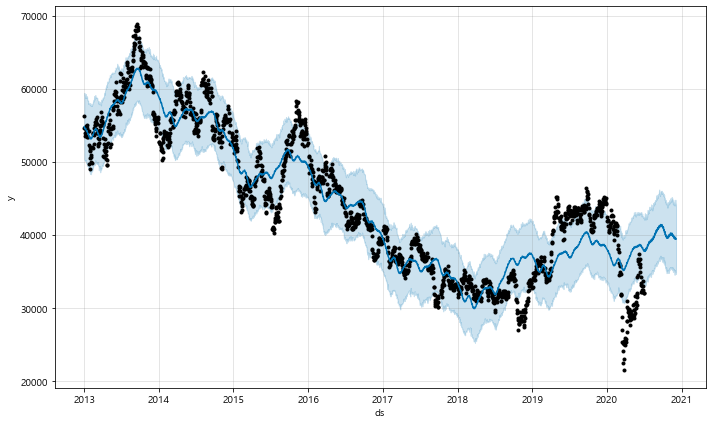

In [19]:
model.plot(forecast);

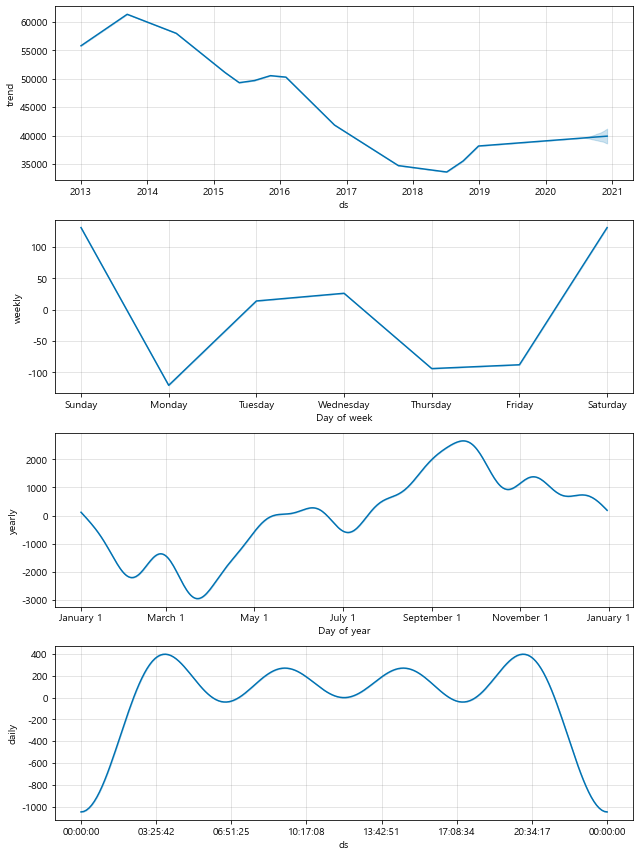

In [20]:
# 요소별로 확인
model.plot_components(forecast);

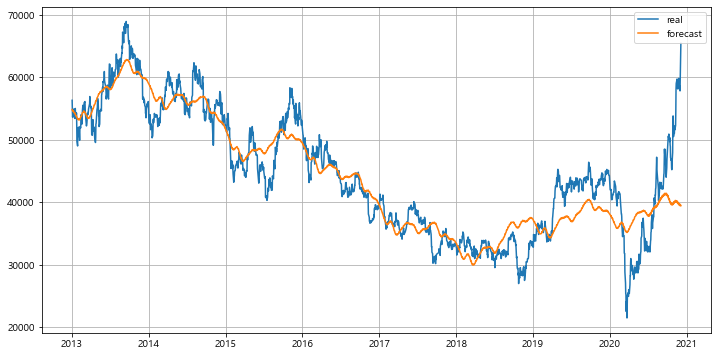

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(kia.index, kia.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')
plt.grid()
plt.legend()
plt.show()

### 삼성전자 주식

In [23]:
start = datetime(2013, 1, 1)
end = datetime(2020, 12, 4)
sam = pdr.DataReader('005930.KS', data_source='yahoo', start=start, end=end)
sam.head()

High      Low     Open    Close      Volume  Adj Close
Date                                                                 
2013-01-02  31520.0  30540.0  30660.0  31520.0  11449650.0  41.799534
2013-01-03  31680.0  30860.0  31640.0  30860.0  14227400.0  40.924290
2013-01-04  30840.0  30200.0  30800.0  30500.0  12999800.0  40.446884
2013-01-07  30560.0  30000.0  30300.0  30400.0  12610950.0  40.314274
2013-01-08  30340.0  29960.0  30260.0  30000.0  13822250.0  39.783821

In [24]:
sam.tail()

High      Low     Open    Close      Volume  Adj Close
Date                                                                 
2020-11-30  68600.0  66700.0  68400.0  66700.0  43811016.0    66700.0
2020-12-01  68300.0  67100.0  67100.0  67800.0  22327173.0    67800.0
2020-12-02  69900.0  68300.0  68400.0  69500.0  29703942.0    69500.0
2020-12-03  70500.0  69300.0  70100.0  69700.0  23677989.0    69700.0
2020-12-04  72100.0  70100.0  70400.0  71500.0  28130533.0    71500.0

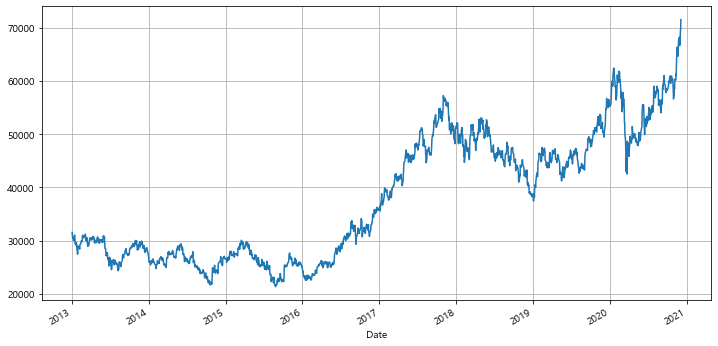

In [25]:
sam.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [26]:
sam_trunc = sam[:'2020-06-30']
sam_trunc.tail()

High      Low     Open    Close      Volume  Adj Close
Date                                                                 
2020-06-24  53900.0  51600.0  51900.0  52900.0  24519552.0    52900.0
2020-06-25  53000.0  51900.0  52100.0  51900.0  18541624.0    51900.0
2020-06-26  53900.0  52200.0  52800.0  53300.0  21575360.0    53300.0
2020-06-29  53200.0  52000.0  52500.0  52400.0  17776925.0    52400.0
2020-06-30  53900.0  52800.0  53900.0  52800.0  21157172.0    52800.0

In [27]:
sam_df = pd.DataFrame({'ds': sam_trunc.index, 'y': sam_trunc.Close})
sam_df.reset_index(inplace=True)
del sam_df['Date']
sam_df.head()

ds        y
0 2013-01-02  31520.0
1 2013-01-03  30860.0
2 2013-01-04  30500.0
3 2013-01-07  30400.0
4 2013-01-08  30000.0

In [29]:
# 삼성 모델학습
sam_model = Prophet(daily_seasonality=True)
sam_model.fit(sam_df)

In [30]:
sam_trunc = sam_model.make_future_dataframe(periods=157)
sam_trunc.tail()

ds
1988 2020-11-30
1989 2020-12-01
1990 2020-12-02
1991 2020-12-03
1992 2020-12-04

In [31]:
sam_forecast = sam_model.predict(sam_trunc)

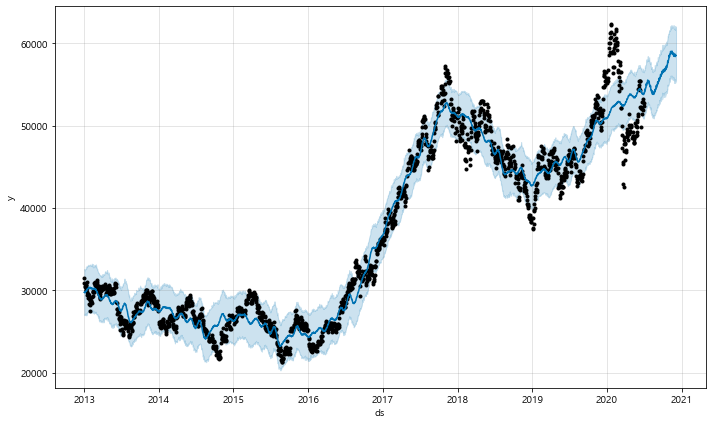

In [32]:
sam_model.plot(sam_forecast);

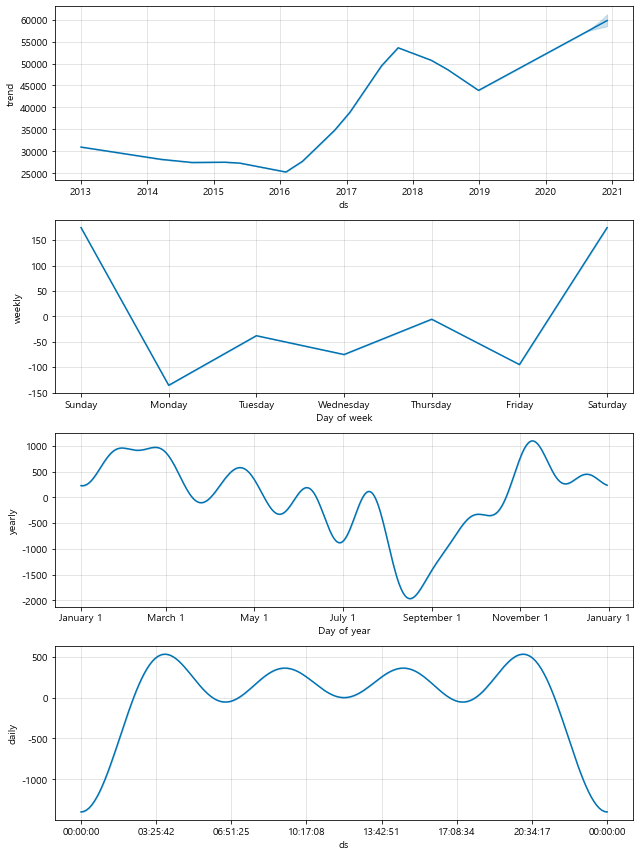

In [33]:
sam_model.plot_components(sam_forecast);

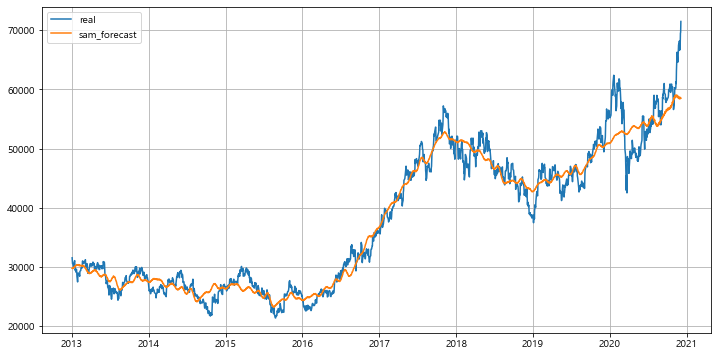

In [34]:
plt.figure(figsize=(12,6))
plt.plot(sam.index, sam.Close, label='real')
plt.plot(sam_forecast.ds, sam_forecast.yhat, label='sam_forecast')
plt.grid()
plt.legend()
plt.show()

### sk 하이닉스 주식

In [35]:
skhi_start = datetime(2013, 1, 1)
skhi_end = datetime(2020, 12, 4)
skhi = pdr.DataReader('000660.KS', data_source='yahoo', start=skhi_start, end=skhi_end)
skhi.head()

High      Low     Open    Close     Volume     Adj Close
Date                                                                   
2013-01-02  26650.0  26100.0  26150.0  26600.0  5136546.0  24682.212891
2013-01-03  27100.0  26400.0  26900.0  26650.0  4581101.0  24728.605469
2013-01-04  26900.0  26200.0  26800.0  26350.0  4845576.0  24450.236328
2013-01-07  26450.0  25650.0  26400.0  25900.0  4272129.0  24032.679688
2013-01-08  26550.0  25950.0  26050.0  26250.0  3456671.0  24357.445312

In [36]:
skhi.tail()

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2020-11-30   99800.0   97300.0   99700.0   97500.0  3877841.0    97500.0
2020-12-01  101500.0   97800.0   98600.0  100500.0  4455519.0   100500.0
2020-12-02  109500.0  103000.0  103000.0  109000.0  7488361.0   109000.0
2020-12-03  114500.0  109000.0  110500.0  111500.0  6617912.0   111500.0
2020-12-04  119500.0  112500.0  116000.0  115000.0  8258814.0   115000.0

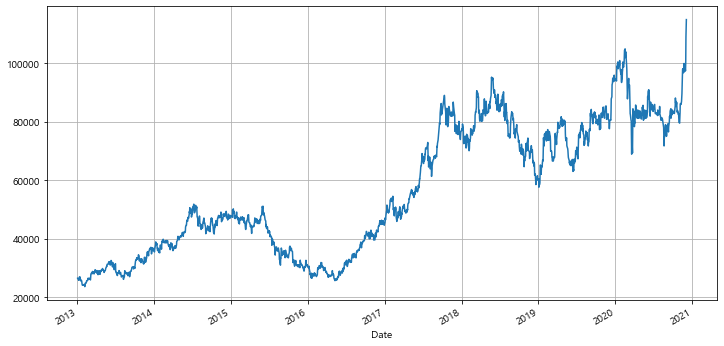

In [37]:
skhi.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [38]:
skhi_trunc = skhi[:'2020-06-30']
skhi_trunc.tail()

High      Low     Open    Close     Volume  Adj Close
Date                                                                
2020-06-24  87400.0  84000.0  84200.0  86000.0  4079834.0    86000.0
2020-06-25  85600.0  84000.0  84300.0  84300.0  3397112.0    84300.0
2020-06-26  86100.0  84500.0  86000.0  84600.0  2889494.0    84600.0
2020-06-29  85300.0  83500.0  84000.0  83600.0  2932433.0    83600.0
2020-06-30  87300.0  85000.0  86200.0  85100.0  4983607.0    85100.0

In [39]:
skhi_df = pd.DataFrame({'ds': skhi_trunc.index, 'y': skhi_trunc.Close})
skhi_df.reset_index(inplace=True)
del skhi_df['Date']
skhi_df.head()

ds        y
0 2013-01-02  26600.0
1 2013-01-03  26650.0
2 2013-01-04  26350.0
3 2013-01-07  25900.0
4 2013-01-08  26250.0

In [40]:
# sk하이닉스 모델학습
skhi_model = Prophet(daily_seasonality=True)
skhi_model.fit(skhi_df)

In [41]:
skhi_trunc = skhi_model.make_future_dataframe(periods=157)
skhi_trunc.tail()

ds
1988 2020-11-30
1989 2020-12-01
1990 2020-12-02
1991 2020-12-03
1992 2020-12-04

In [42]:
skhi_forecast = skhi_model.predict(skhi_trunc)

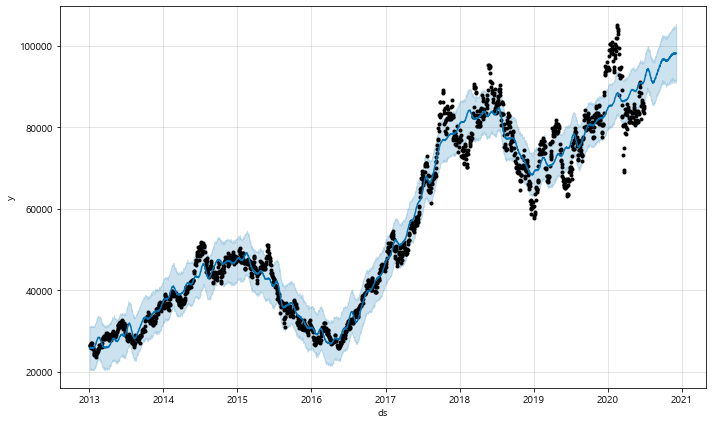

In [43]:
skhi_model.plot(skhi_forecast);

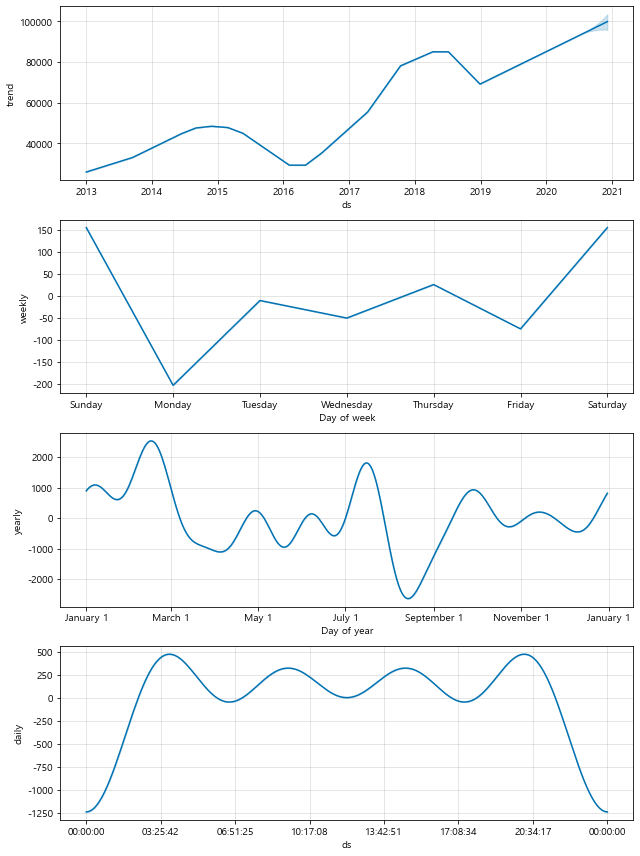

In [44]:
skhi_model.plot_components(skhi_forecast);

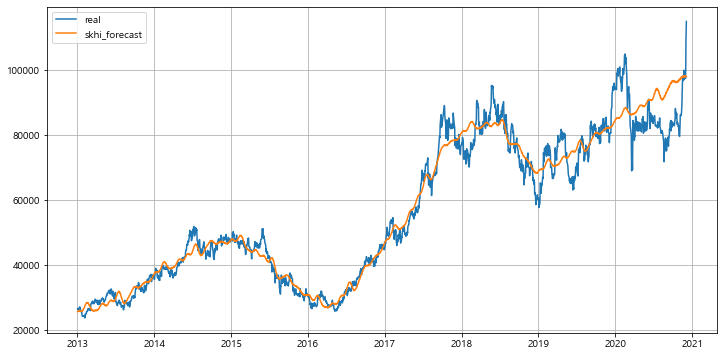

In [45]:
plt.figure(figsize=(12,6))
plt.plot(skhi.index, skhi.Close, label='real')
plt.plot(skhi_forecast.ds, skhi_forecast.yhat, label='skhi_forecast')
plt.grid()
plt.legend()
plt.show()

### 카카오 주식

In [46]:
kaka_start = datetime(2013, 1, 1)
kaka_end = datetime(2020, 12, 4)
kaka = pdr.DataReader('035720.KS', data_source='yahoo', start=kaka_start, end=kaka_end)
kaka.head()

High       Low      Open     Close    Volume      Adj Close
Date                                                                       
2013-01-02   93500.0   90700.0   91100.0   93300.0   78700.0   91506.468750
2013-01-03   94500.0   92500.0   94300.0   93700.0   81837.0   91898.781250
2013-01-04  100500.0   94000.0   94600.0   99900.0  263931.0   97979.593750
2013-01-07  104200.0   99900.0  101900.0  103700.0  277747.0  101706.546875
2013-01-08  103700.0  101500.0  102100.0  103000.0  154667.0  101020.000000

In [47]:
kaka.tail()

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2020-11-30  374000.0  368000.0  373000.0  368000.0   544990.0   368000.0
2020-12-01  375000.0  369000.0  369500.0  374500.0   452723.0   374500.0
2020-12-02  375500.0  371000.0  375500.0  373000.0   440500.0   373000.0
2020-12-03  374000.0  369000.0  373000.0  374000.0   464371.0   374000.0
2020-12-04  392500.0  371000.0  374000.0  389500.0  1561745.0   389500.0

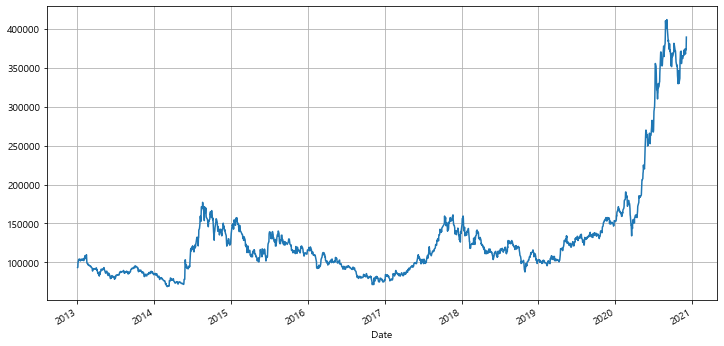

In [48]:
kaka.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [49]:
kaka_trunc = kaka[:'2020-06-30']
kaka_trunc.tail()

High       Low      Open     Close     Volume  Adj Close
Date                                                                    
2020-06-24  284000.0  275000.0  281500.0  282500.0  1081233.0   282500.0
2020-06-25  282000.0  273500.0  278500.0  274500.0   900258.0   274500.0
2020-06-26  280000.0  268000.0  279500.0  274500.0   812726.0   274500.0
2020-06-29  273500.0  266000.0  269000.0  267500.0   778818.0   267500.0
2020-06-30  273000.0  267500.0  272000.0  267500.0   624089.0   267500.0

In [50]:
kaka_df = pd.DataFrame({'ds': kaka_trunc.index, 'y': kaka_trunc.Close})
kaka_df.reset_index(inplace=True)
del kaka_df['Date']
kaka_df.head()

ds         y
0 2013-01-02   93300.0
1 2013-01-03   93700.0
2 2013-01-04   99900.0
3 2013-01-07  103700.0
4 2013-01-08  103000.0

In [51]:
# 카카오 모델학습
kaka_model = Prophet(daily_seasonality=True)
kaka_model.fit(kaka_df)

In [52]:
kaka_trunc = kaka_model.make_future_dataframe(periods=157)
kaka_trunc.tail()

ds
1988 2020-11-30
1989 2020-12-01
1990 2020-12-02
1991 2020-12-03
1992 2020-12-04

In [53]:
kaka_forecast = kaka_model.predict(kaka_trunc)

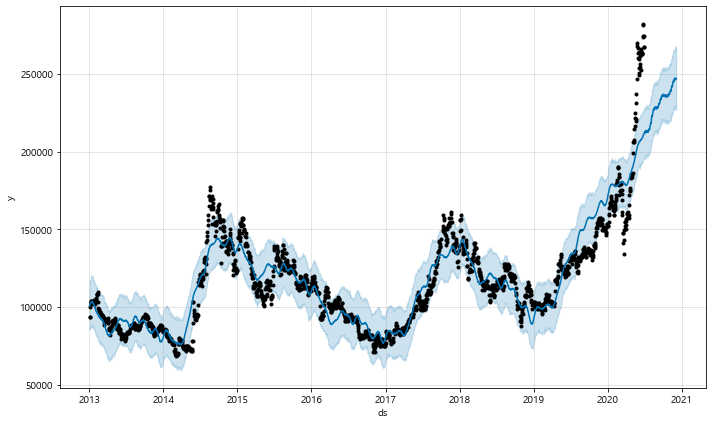

In [54]:
kaka_model.plot(kaka_forecast);

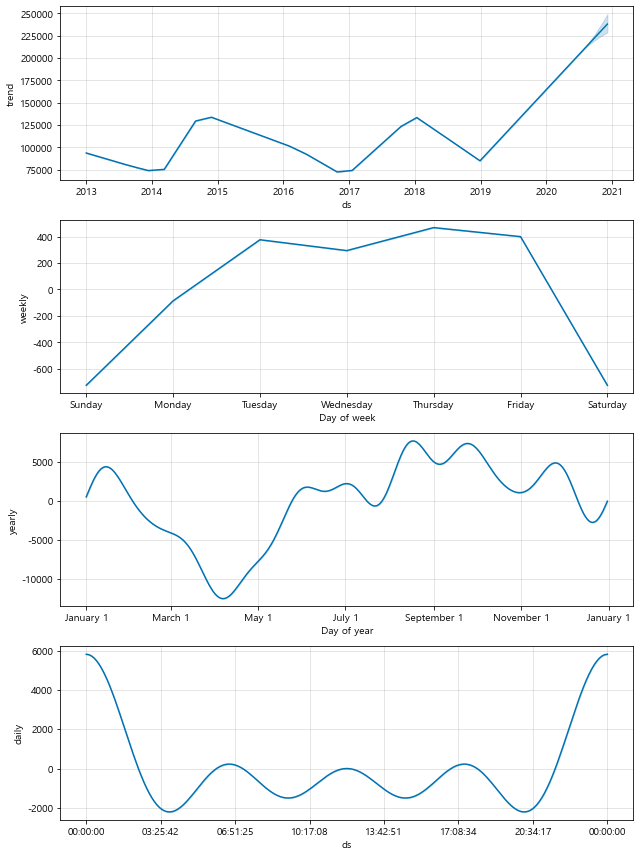

In [55]:
kaka_model.plot_components(kaka_forecast);

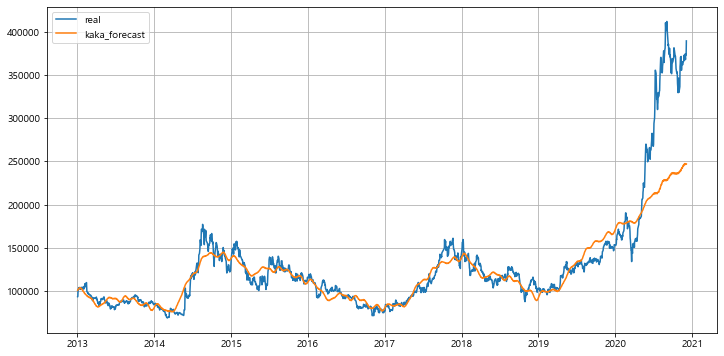

In [56]:
plt.figure(figsize=(12,6))
plt.plot(kaka.index, kaka.Close, label='real')
plt.plot(kaka_forecast.ds, kaka_forecast.yhat, label='kaka_forecast')
plt.grid()
plt.legend()
plt.show()

## LG전자 주식

In [57]:
lg_start = datetime(2013, 1, 1)
lg_end = datetime(2020, 12, 4)
lg = pdr.DataReader('066570.KS', data_source='yahoo', start=lg_start, end=lg_end)
lg.head()

High      Low     Open    Close     Volume     Adj Close
Date                                                                   
2013-01-02  77800.0  74500.0  74600.0  77500.0  2038652.0  74340.242188
2013-01-03  79800.0  76700.0  78200.0  78500.0  2163160.0  75299.476562
2013-01-04  79200.0  77500.0  78800.0  78700.0  1236340.0  75491.335938
2013-01-07  79600.0  77700.0  79000.0  78700.0  1307963.0  75491.335938
2013-01-08  79400.0  78100.0  78300.0  78400.0   909911.0  75203.546875

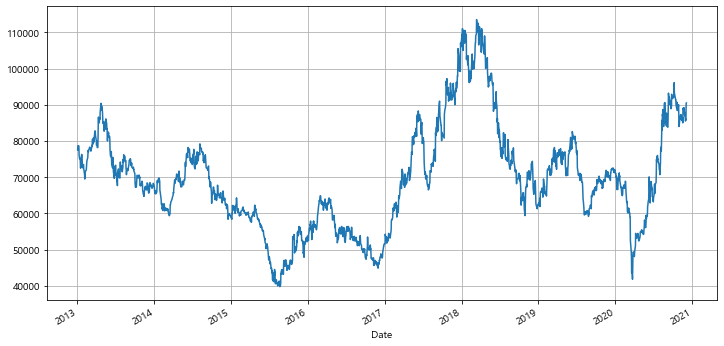

In [58]:
lg.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [59]:
lg_trunc = lg[:'2020-06-30']
lg_trunc.tail()

High      Low     Open    Close    Volume  Adj Close
Date                                                               
2020-06-24  68000.0  66200.0  66400.0  67000.0  622511.0    67000.0
2020-06-25  66000.0  64600.0  65600.0  64700.0  798688.0    64700.0
2020-06-26  65500.0  64500.0  65500.0  64700.0  528872.0    64700.0
2020-06-29  64000.0  62500.0  63800.0  63500.0  756841.0    63500.0
2020-06-30  64500.0  63200.0  64000.0  63200.0  648411.0    63200.0

In [60]:
lg_df = pd.DataFrame({'ds': lg_trunc.index, 'y': lg_trunc.Close})
lg_df.reset_index(inplace=True)
del lg_df['Date']
lg_df.head()

ds        y
0 2013-01-02  77500.0
1 2013-01-03  78500.0
2 2013-01-04  78700.0
3 2013-01-07  78700.0
4 2013-01-08  78400.0

In [63]:
# lg 모델학습
lg_model = Prophet(daily_seasonality=True)
lg_model.fit(lg_df)

In [64]:
lg_trunc = lg_model.make_future_dataframe(periods=157)
lg_trunc.tail()

ds
1988 2020-11-30
1989 2020-12-01
1990 2020-12-02
1991 2020-12-03
1992 2020-12-04

In [65]:
lg_forecast = lg_model.predict(lg_trunc)

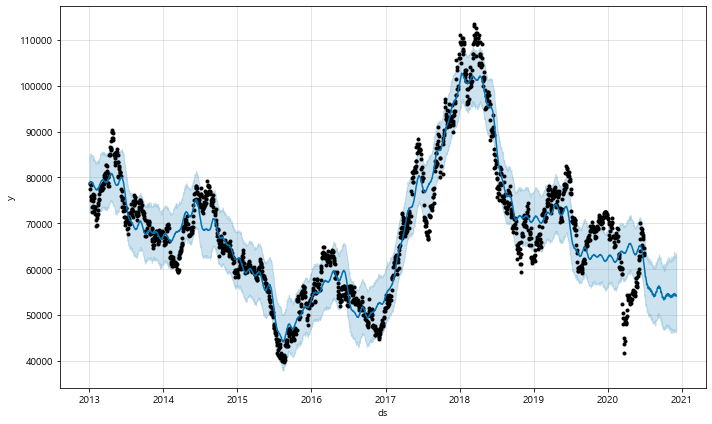

In [66]:
lg_model.plot(lg_forecast);

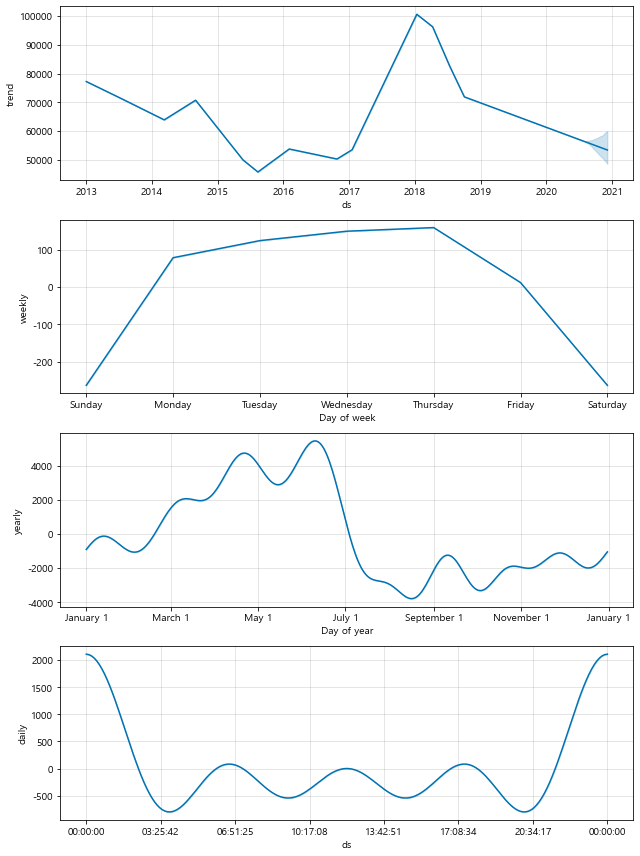

In [67]:
lg_model.plot_components(lg_forecast);

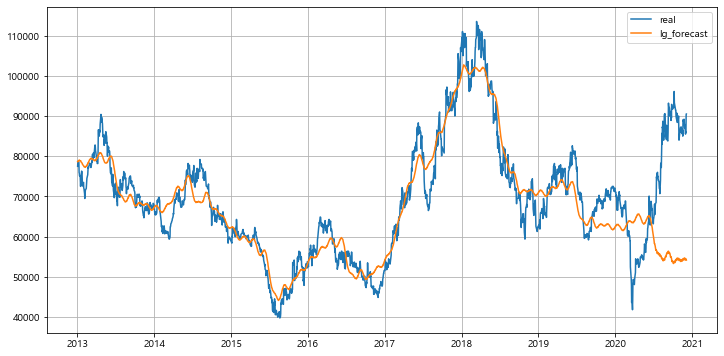

In [68]:
plt.figure(figsize=(12,6))
plt.plot(lg.index, lg.Close, label='real')
plt.plot(lg_forecast.ds, lg_forecast.yhat, label='lg_forecast')
plt.grid()
plt.legend()
plt.show()

### 알리바바 그룹 홀딩스 주식

In [71]:
baba_start = datetime(2013, 1, 1)
baba_end = datetime(2020, 12, 4)
baba = pdr.DataReader('BABA', data_source='yahoo', start=baba_start, end=baba_end)
baba.head()

High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2014-09-19  99.699997  89.949997  92.699997  93.889999  271879400  93.889999
2014-09-22  92.949997  89.500000  92.699997  89.889999   66657800  89.889999
2014-09-23  90.480003  86.620003  88.940002  87.169998   39009800  87.169998
2014-09-24  90.570000  87.220001  88.470001  90.570000   32088000  90.570000
2014-09-25  91.500000  88.500000  91.089996  88.919998   28598000  88.919998

In [72]:
baba.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2020-11-30  268.970001  262.519989  268.970001  263.359985  30476100   
2020-12-01  265.670013  261.570007  265.470001  264.010010  14606300   
2020-12-02  263.100006  260.109985  262.000000  261.320007  13919700   
2020-12-03  268.600006  263.140015  263.779999  266.910004  15520500   
2020-12-04  271.299988  266.269989  271.019989  267.250000  15515700   

             Adj Close  
Date                    
2020-11-30  263.359985  
2020-12-01  264.010010  
2020-12-02  261.320007  
2020-12-03  266.910004  
2020-12-04  267.250000

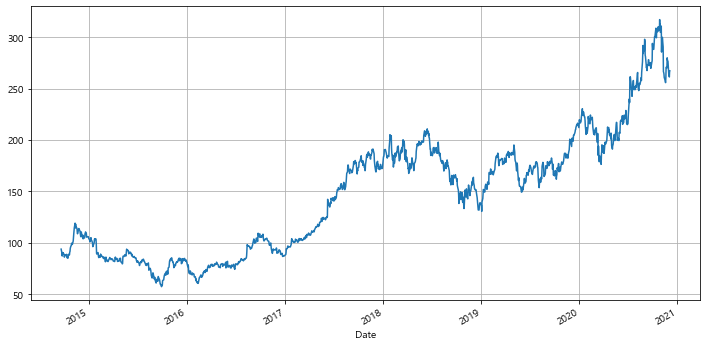

In [73]:
baba.Close.plot(figsize=(12,6), grid=True)
plt.show()

In [74]:
baba_trunc = baba[:'2020-06-30']
baba_trunc.tail()

High         Low        Open       Close    Volume  \
Date                                                                   
2020-06-24  231.029999  224.251999  228.300003  226.220001  12159500   
2020-06-25  224.690002  220.869995  224.589996  222.160004  14953100   
2020-06-26  222.259995  213.500000  222.210007  215.710007  19340600   
2020-06-29  216.500000  211.820007  215.029999  215.020004  12333000   
2020-06-30  216.429993  212.889999  215.740005  215.699997  12933800   

             Adj Close  
Date                    
2020-06-24  226.220001  
2020-06-25  222.160004  
2020-06-26  215.710007  
2020-06-29  215.020004  
2020-06-30  215.699997

In [75]:
baba_df = pd.DataFrame({'ds': baba_trunc.index, 'y': baba_trunc.Close})
baba_df.reset_index(inplace=True)
del baba_df['Date']
baba_df.head()

ds          y
0 2014-09-19  93.889999
1 2014-09-22  89.889999
2 2014-09-23  87.169998
3 2014-09-24  90.570000
4 2014-09-25  88.919998

In [76]:
# 삼성 모델학습
baba_model = Prophet(daily_seasonality=True)
baba_model.fit(baba_df)

In [81]:
# 180일 정보를 예측
baba_trunc = baba_model.make_future_dataframe(periods=180)
baba_trunc.tail()

ds
1630 2020-12-23
1631 2020-12-24
1632 2020-12-25
1633 2020-12-26
1634 2020-12-27

In [83]:
baba_forecast = baba_model.predict(baba_trunc)

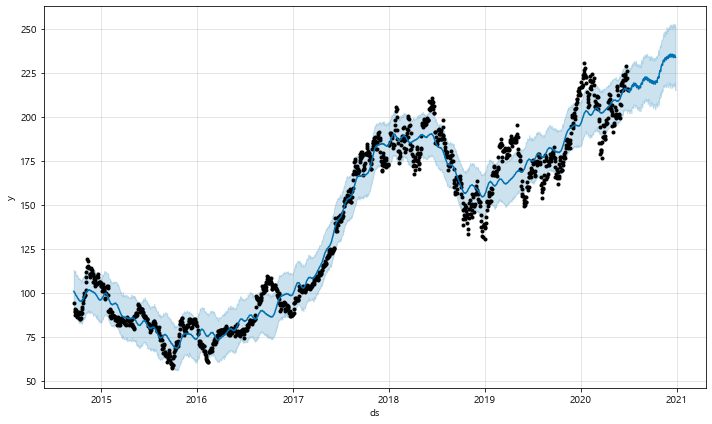

In [84]:
baba_model.plot(baba_forecast);

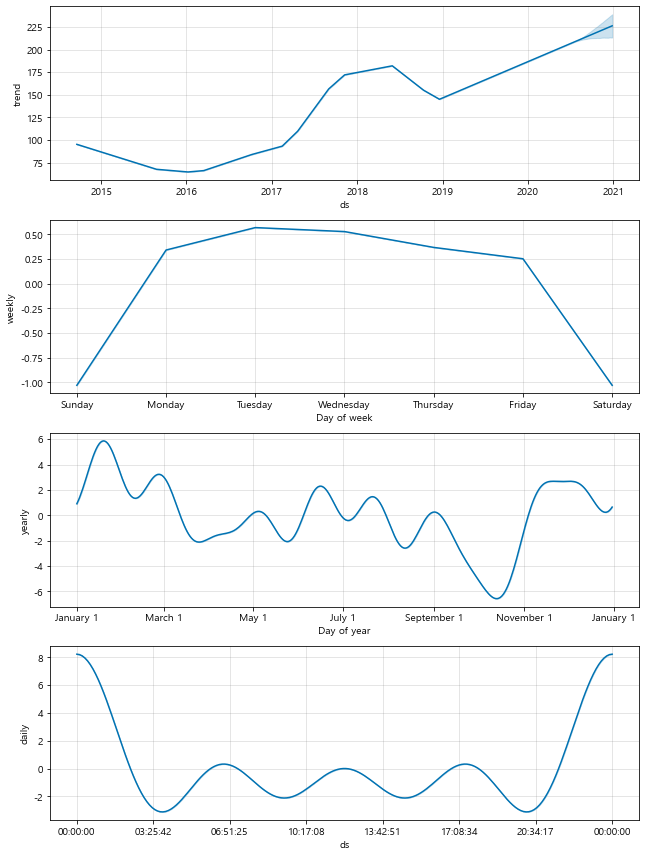

In [85]:
baba_model.plot_components(baba_forecast);

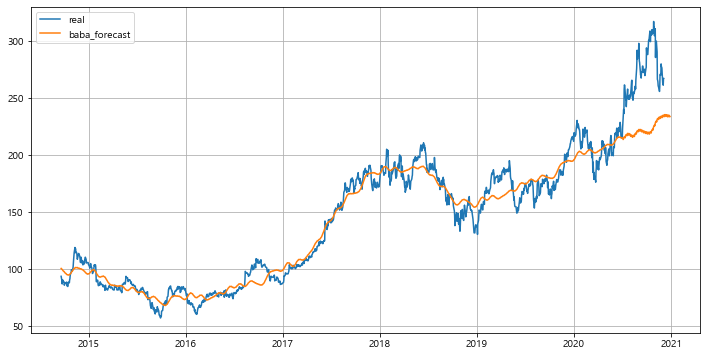

In [87]:
plt.figure(figsize=(12,6))
plt.plot(baba.index, baba.Close, label='real')
plt.plot(baba_forecast.ds, baba_forecast.yhat, label='baba_forecast')
plt.grid()
plt.legend()
plt.show()